# Кластерный анализ. Степанникова

In [1]:
import pandas as pd
import os
import gower
import matplotlib
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

#считаем данные и проверим
df = pd.read_csv("/Users/allastepannikova/Downloads/bank.csv", sep = ";", decimal = ",")
df = df.dropna()  #удалим пустые значения
df.head()

,age,job,marital,education,default,balance,housing,loan,y
0,30,unemployed,married,primary,no,1787,no,no,no
1,33,services,married,secondary,no,4789,yes,yes,no
2,35,management,single,tertiary,no,1350,yes,no,no
3,30,management,married,tertiary,no,1476,yes,yes,no
4,59,blue-collar,married,secondary,no,0,yes,no,no


In [2]:
data = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'y']]
data_encoded = pd.get_dummies(df)
scaler = preprocessing.MinMaxScaler() 
#стандартизация возраста и баланса
scaler.fit(data_encoded[['age', 'balance']])
data_encoded[['age', 'balance']] = scaler.transform(data_encoded[['age', 'balance']])
df_new = data_encoded
df_new

,age,balance,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
0,0.172414,0.121033,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
1,0.224138,0.225833,False,False,False,False,False,False,False,True,...,False,False,True,False,False,True,False,True,True,False
2,0.258621,0.105778,False,False,False,False,True,False,False,False,...,True,False,True,False,False,True,True,False,True,False
3,0.172414,0.110176,False,False,False,False,True,False,False,False,...,True,False,True,False,False,True,False,True,True,False
4,0.672414,0.058649,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.672414,0.058649,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
394,0.310345,0.106476,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
395,0.655172,0.059941,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,True,False,True,False
396,0.241379,0.082143,False,False,False,False,True,False,False,False,...,True,False,True,False,False,True,False,True,True,False


/var/folders/d9/bfhvjqps6xdds9gmhtflh16c0000gn/T/ipykernel_13094/2462532261.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dm, method = 'complete')


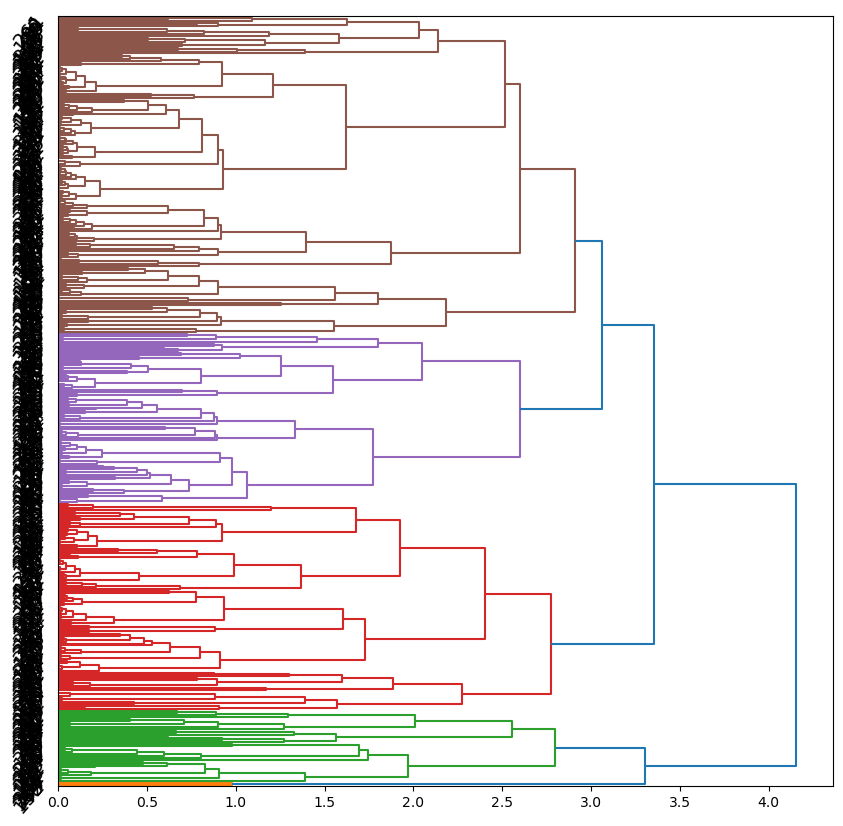

In [3]:
dm = gower.gower_matrix(df_new)
link = linkage(dm, method = 'complete')
fig = plt.figure(figsize=(10,10))
dn = dendrogram(link,
                leaf_font_size = 14, 
                orientation = "right",
                leaf_rotation=50)
#дендограмма схожести покупателей в кластерах

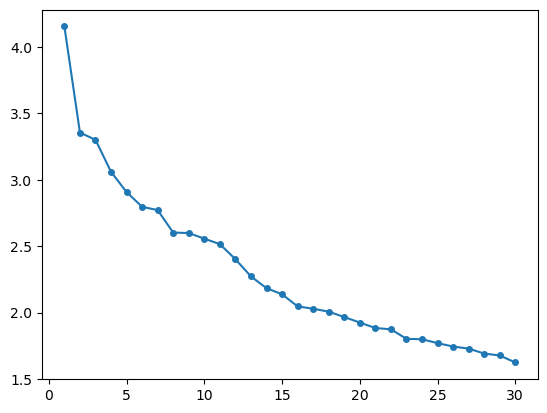

In [4]:
d = link[:,2]
dist = d[::-1][:30]
ind = range(1, 31)
plt.plot(ind, dist, marker='o', markersize='4')
#каменистая осыпь для метода gower. лучшее количество кластеров на мой взгляд - 8

In [5]:
df_new['cluster'] = fcluster(link, 2.68, criterion='distance')
df_new.groupby('cluster').mean()

,age,balance,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
cluster,,,,,,,,,,,,,,,,,,,,,
1,0.318966,0.039483,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
2,0.250000,0.079515,0.150000,0.200000,0.000000,0.000000,0.000000,0.000000,0.050000,0.100000,...,0.000000,0.000000,0.900000,0.100000,1.000000,0.000000,0.400000,0.600000,0.650000,0.350000
3,0.391481,0.169291,0.000000,0.176471,0.058824,0.058824,0.294118,0.176471,0.058824,0.000000,...,0.647059,0.058824,1.000000,0.000000,1.000000,0.000000,0.764706,0.235294,0.235294,0.764706
4,0.317241,0.109003,0.050000,0.000000,0.100000,0.000000,0.500000,0.050000,0.000000,0.000000,...,1.000000,0.000000,0.900000,0.100000,0.000000,1.000000,0.500000,0.500000,0.600000,0.400000
5,0.317876,0.120672,0.068966,0.011494,0.045977,0.011494,0.563218,0.011494,0.068966,0.022989,...,0.977011,0.022989,0.988506,0.011494,0.517241,0.482759,0.965517,0.034483,1.000000,0.000000
6,0.430643,0.135200,0.056818,0.215909,0.022727,0.045455,0.113636,0.079545,0.068182,0.090909,...,0.045455,0.034091,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.886364,0.113636
7,0.404158,0.087769,0.176471,0.294118,0.029412,0.000000,0.058824,0.029412,0.058824,0.117647,...,0.000000,0.000000,0.970588,0.029412,0.411765,0.588235,0.000000,1.000000,1.000000,0.000000
8,0.335411,0.103920,0.192308,0.361538,0.015385,0.015385,0.061538,0.046154,0.023077,0.100000,...,0.000000,0.076923,0.992308,0.007692,0.000000,1.000000,0.961538,0.038462,0.930769,0.069231


In [6]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_new, df_new['cluster'])
silhouette_avg #оценка силуэта

0.2500129751778035

In [7]:
df_new[['age', 'balance']] = df[['age', 'balance']]
df_new.groupby('cluster').mean()

,age,balance,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
cluster,,,,,,,,,,,,,,,,,,,,,
1,38.500000,-549.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
2,34.500000,597.700000,0.150000,0.200000,0.000000,0.000000,0.000000,0.000000,0.050000,0.100000,...,0.000000,0.000000,0.900000,0.100000,1.000000,0.000000,0.400000,0.600000,0.650000,0.350000
3,42.705882,3169.352941,0.000000,0.176471,0.058824,0.058824,0.294118,0.176471,0.058824,0.000000,...,0.647059,0.058824,1.000000,0.000000,1.000000,0.000000,0.764706,0.235294,0.235294,0.764706
4,38.400000,1442.400000,0.050000,0.000000,0.100000,0.000000,0.500000,0.050000,0.000000,0.000000,...,1.000000,0.000000,0.900000,0.100000,0.000000,1.000000,0.500000,0.500000,0.600000,0.400000
5,38.436782,1776.655172,0.068966,0.011494,0.045977,0.011494,0.563218,0.011494,0.068966,0.022989,...,0.977011,0.022989,0.988506,0.011494,0.517241,0.482759,0.965517,0.034483,1.000000,0.000000
6,44.977273,2192.795455,0.056818,0.215909,0.022727,0.045455,0.113636,0.079545,0.068182,0.090909,...,0.045455,0.034091,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.886364,0.113636
7,43.441176,834.147059,0.176471,0.294118,0.029412,0.000000,0.058824,0.029412,0.058824,0.117647,...,0.000000,0.000000,0.970588,0.029412,0.411765,0.588235,0.000000,1.000000,1.000000,0.000000
8,39.453846,1296.784615,0.192308,0.361538,0.015385,0.015385,0.061538,0.046154,0.023077,0.100000,...,0.000000,0.076923,0.992308,0.007692,0.000000,1.000000,0.961538,0.038462,0.930769,0.069231


1. кластер с отрицательным балансом - скорее всего не выплатят
2. кластер среднего возраста почти без дефолтов без своего жилья - риск не выплаты относительно ниже первого класса, но все равно высокий
3. кластер с неоднозначиными решениями по кредитам и самыми большими балансами и вероятностью выплаты
4. в большей степени имеют высшее образование и свое жилье, большой баланс 
5. также в основном окончившие высшее образование, в основном без долгов 
6. без своего жилья, но большим балансом, без долгов - самая старшая групппа
7. кластер второй по возрасту, с долгами, почти 100% не выплатят
8. этот кластер мало чем отличается от предыдущего, я бы их объединила

## K-means

In [8]:
from sklearn.cluster import KMeans
data_encoded1 = pd.get_dummies(df)
scaler = preprocessing.MinMaxScaler() 
#стандартизация возраста и баланса
scaler.fit(data_encoded1[['age', 'balance']])
data_encoded1[['age', 'balance']] = scaler.transform(data_encoded1[['age', 'balance']])
df_new = data_encoded1
df_new

,age,balance,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
0,0.172414,0.121033,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
1,0.224138,0.225833,False,False,False,False,False,False,False,True,...,False,False,True,False,False,True,False,True,True,False
2,0.258621,0.105778,False,False,False,False,True,False,False,False,...,True,False,True,False,False,True,True,False,True,False
3,0.172414,0.110176,False,False,False,False,True,False,False,False,...,True,False,True,False,False,True,False,True,True,False
4,0.672414,0.058649,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.672414,0.058649,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
394,0.310345,0.106476,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
395,0.655172,0.059941,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,True,False,True,False
396,0.241379,0.082143,False,False,False,False,True,False,False,False,...,True,False,True,False,False,True,False,True,True,False


In [9]:
#проверим 8 кластеров на методе k-means
model = KMeans(n_clusters=8, random_state=25, max_iter=100, n_init=10, 
               verbose=0, tol=0.0001 )
model.fit(df_new)

KMeans(max_iter=100, n_init=10, random_state=25)

In [10]:
df_new['cluster_kmeans'] = model.labels_
silhouette_avg = silhouette_score(df_new, df_new['cluster_kmeans'])

In [11]:
silhouette_avg #метрика стала больше

0.347720997475745

In [12]:
df_new[['age', 'balance']] = df[['age', 'balance']]
df_new.groupby('cluster_kmeans').mean()

,age,balance,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
cluster_kmeans,,,,,,,,,,,,,,,,,,,,,
0,39.837500,1098.737500,0.212500,0.312500,0.012500,0.000000,0.062500,0.050000,0.025000,0.087500,...,0.000000,0.000000,0.987500,0.012500,0.000000,1.000000,0.787500,0.212500,0.962500,0.037500
1,41.233333,2232.333333,0.133333,0.166667,0.000000,0.033333,0.100000,0.133333,0.066667,0.100000,...,0.300000,0.033333,1.000000,0.000000,0.900000,0.100000,1.000000,0.000000,0.000000,1.000000
2,42.883721,1464.046512,0.162791,0.023256,0.093023,0.000000,0.372093,0.069767,0.069767,0.046512,...,0.790698,0.209302,0.976744,0.023256,0.000000,1.000000,0.883721,0.116279,0.837209,0.162791
3,46.092593,2199.574074,0.111111,0.148148,0.037037,0.018519,0.111111,0.055556,0.055556,0.111111,...,0.000000,0.037037,0.981481,0.018519,1.000000,0.000000,0.796296,0.203704,1.000000,0.000000
4,39.339623,1934.377358,0.018868,0.018868,0.075472,0.018868,0.660377,0.000000,0.056604,0.000000,...,0.962264,0.018868,0.981132,0.018868,1.000000,0.000000,0.867925,0.132075,0.962264,0.037736
5,34.151515,1117.303030,0.151515,0.181818,0.000000,0.000000,0.030303,0.030303,0.090909,0.090909,...,0.000000,0.000000,0.969697,0.030303,0.848485,0.151515,0.484848,0.515152,0.969697,0.030303
6,35.192308,2034.442308,0.096154,0.115385,0.019231,0.000000,0.288462,0.000000,0.000000,0.134615,...,0.500000,0.038462,0.961538,0.038462,0.000000,1.000000,0.884615,0.115385,0.961538,0.038462
7,44.716981,1061.830189,0.018868,0.603774,0.018868,0.094340,0.056604,0.075472,0.056604,0.018868,...,0.000000,0.018868,0.962264,0.037736,0.415094,0.584906,0.867925,0.132075,0.962264,0.037736


кластеры получились отличные от первого метода. здесь уже нет отрицательного баланса и есть кластер с точным y=да. На мой взгляд можно было бы оставить 4 кластера, которые дифференцировались только по вероятности возврата кредита - тк это самый важный вопрос.